In [179]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [180]:
in_path = 'C:\\Users\\joaquin\\usda\\raw\\CookIRCamET\\Spectrometer\\'
out_path = 'C:\\Users\\joaquin\\usda\\work\\CookIRCamET\\Spectrometer\\'

In [181]:
soil_reflectance = pd.read_csv(os.path.join(in_path,'Soil_08_18.csv'),delimiter=',')
soil_water = pd.read_excel(os.path.join(in_path,'Moisture_Data_Round_2.xlsx'),sheet_name='Soils')

residue_reflectance = pd.read_csv(os.path.join(in_path,'Residue_08_18.csv'),delimiter=',')
residue_water = pd.read_excel(os.path.join(in_path,'Moisture_Data_Round_2.xlsx'),sheet_name='Crop Residues')

C:\Users\joaquin\anaconda3\envs\python-cv\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [182]:
soil_reflectance.rename(columns={"Crop":"Soil"},inplace=True)

In [183]:
soil_water.rename(columns={"Residue":"Soil"},inplace=True)

In [184]:
soil_water=soil_water[["Soil","Scan","Gravimetric"]]
soil_reflectance=soil_reflectance[["Soil","Scan","Reflect. %","Wvl","RWC"]]

In [185]:
residue_reflectance.rename(columns={"Crop":"Residue"},inplace=True)

In [186]:
residue_water=residue_water[["Residue","Scan","Gravimetric"]]
residue_reflectance=residue_reflectance[["Residue","Scan","Reflect. %","Wvl","RWC"]]

In [187]:
soil_reflectance.Soil=soil_reflectance.apply(lambda row : row['Soil'].lower(), axis = 1)

In [188]:
residue_reflectance.Residue=residue_reflectance.apply(lambda row : row['Residue'].lower(), axis = 1)

In [189]:
soil_water.Soil=soil_water.apply(lambda row : row['Soil'].lower(), axis = 1)

In [190]:
residue_water.Residue=residue_water.apply(lambda row : row['Residue'].lower(), axis = 1)

In [191]:
residue_reflectance=residue_reflectance.merge(residue_water,how='left')
soil_reflectance=soil_reflectance.merge(soil_water,how='left')

In [192]:
soil_reflectance.RWC=soil_reflectance.apply(lambda row : min(row['RWC'],1), axis = 1)

In [193]:
residue_reflectance.RWC=residue_reflectance.apply(lambda row : min(row['RWC'],1), axis = 1)

<AxesSubplot:xlabel='Wvl', ylabel='Reflect. %'>

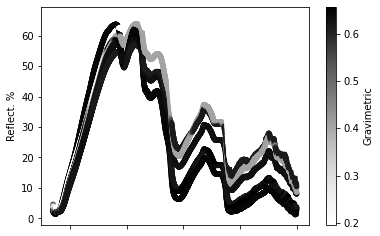

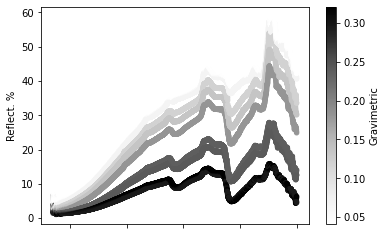

In [194]:
residue_reflectance[residue_reflectance['Residue']=='wheat duet'].plot.scatter('Wvl','Reflect. %',c='Gravimetric')
soil_reflectance[soil_reflectance['Soil']=='palouse_no_till'].plot.scatter('Wvl','Reflect. %',c='Gravimetric')

In [195]:
soil_reflectance

,Soil,Scan,Reflect. %,Wvl,RWC,Gravimetric
0,almira_bottom,Scan1,1.08880,350,1.00,0.252272
1,almira_top,Scan1,3.09065,350,1.00,0.261526
2,bickleton_bottom,Scan1,2.56815,350,1.00,0.240361
3,bickleton_top,Scan1,2.50740,350,0.76,0.212057
4,lind_bottom,Scan1,1.91445,350,1.00,0.215299
...,...,...,...,...,...,...
225850,lind_bottom,Scan9,44.76480,2500,0.07,0.017588
225851,lind_top,Scan9,42.94675,2500,0.08,0.019892
225852,palouse_conv_till,Scan9,37.98675,2500,0.10,0.032073
225853,palouse_no_till,Scan9,42.18660,2500,0.09,0.040625


In [196]:
nir_min=800
nir_max=2500
vis_min=400
vis_max=800

In [197]:
resid_nir = (residue_reflectance['Residue']=='wheat duet') & (residue_reflectance['Wvl']>nir_min) & (residue_reflectance['Wvl']<=nir_max)
resid_vis = (residue_reflectance['Residue']=='wheat duet') &  (residue_reflectance['Wvl']>vis_min) & (residue_reflectance['Wvl']<=vis_max)
resid_nir_r=residue_reflectance[resid_nir].groupby('RWC').mean('Reflect. %')
resid_vis_r=residue_reflectance[resid_vis].groupby('RWC').mean('Reflect. %')

In [198]:
soil_nir = (soil_reflectance['Soil']=='palouse_no_till') & (soil_reflectance['Wvl']>nir_min) & (soil_reflectance['Wvl']<=nir_max)
soil_vis = (soil_reflectance['Soil']=='palouse_no_till') & (soil_reflectance['Wvl']>vis_min) & (soil_reflectance['Wvl']<=vis_max)
soil_nir_r=residue_reflectance[soil_nir].groupby('RWC').mean('Reflect. %')
soil_vis_r=residue_reflectance[soil_vis].groupby('RWC').mean('Reflect. %')

C:\Users\joaquin\AppData\Local\Temp/ipykernel_18276/4010172243.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  soil_nir_r=residue_reflectance[soil_nir].groupby('RWC').mean('Reflect. %')
C:\Users\joaquin\AppData\Local\Temp/ipykernel_18276/4010172243.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  soil_vis_r=residue_reflectance[soil_vis].groupby('RWC').mean('Reflect. %')


<AxesSubplot:xlabel='RWC'>

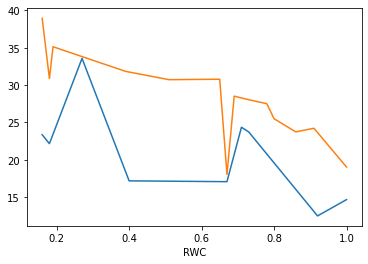

In [199]:
soil_vis_r['Reflect. %'].plot()
soil_nir_r['Reflect. %'].plot()

<AxesSubplot:xlabel='RWC'>

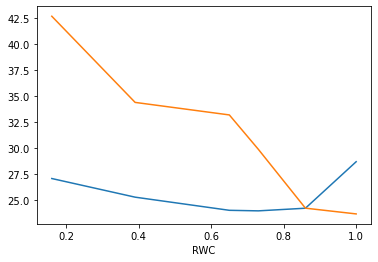

In [201]:
resid_vis_r['Reflect. %'].plot()
resid_nir_r['Reflect. %'].plot()

In [202]:
resid_vis_r['RWC']=resid_vis_r.index

In [203]:
resid_nir_r['RWC']=resid_nir_r.index
soil_vis_r['RWC']=soil_vis_r.index
soil_nir_r['RWC']=soil_nir_r.index

In [204]:
sat = 1-1.2/2.66
print(sat)
sat = 1-1.28/2.66
print(sat)

Reflectance is more linear when treated as a function of RWC, not gravimetric.

Cook data:

Palouse sandy loam

$\theta_{wp}$ = 13.4

$\theta_{fc}$ = 28.6

In [216]:
x=soil_nir_r.values[:,-1].reshape(-1, 1)
y=soil_nir_r.values[:,0].reshape(-1, 1)/100

lm_soil_nir = LinearRegression()  # create object for the class
lm_soil_nir.fit(x, y)  # perform linear regression

print(lm_soil_nir.intercept_[0])
print(lm_soil_nir.coef_[0][0])

0.3821465320954313
-0.16685908130002586


In [217]:
x=soil_vis_r.values[:,-1].reshape(-1, 1)
y=soil_vis_r.values[:,0].reshape(-1, 1)/100

lm_soil_vis = LinearRegression()  # create object for the class
lm_soil_vis.fit(x, y)  # perform linear regression

print(lm_soil_vis.intercept_[0])
print(lm_soil_vis.coef_[0][0])

0.27754298458493715
-0.12159703272810905


In [218]:
x=resid_nir_r.values[:,-1].reshape(-1, 1)
y=resid_nir_r.values[:,0].reshape(-1, 1)/100

lm_residue_nir = LinearRegression()  # create object for the class
lm_residue_nir.fit(x, y)  # perform linear regression

print(lm_residue_nir.intercept_[0])
print(lm_residue_nir.coef_[0][0])

0.4542886851320105
-0.22323314268919867


In [219]:
x=resid_vis_r.values[:,-1].reshape(-1, 1)
y=resid_vis_r.values[:,0].reshape(-1, 1)/100

lm_residue_vis = LinearRegression()  # create object for the class
lm_residue_vis.fit(x, y)  # perform linear regression

print(lm_residue_vis.intercept_[0])
print(lm_residue_vis.coef_[0][0])

0.2548726546168309
0.00031083701820966805


Bushland data:

Pullman clay loam

$\theta_{wp}$ = 21.3

$\theta_{fc}$ = 33.6

In [214]:
x = np.array([0,1]).reshape(-1, 1)
y = np.array([25,15]).reshape(-1, 1)/100

lm_soil_nir = LinearRegression()  # create object for the class
lm_soil_nir.fit(x, y)  # perform linear regression

print(lm_soil_nir.intercept_[0])
print(lm_soil_nir.coef_[0][0])

0.25
-0.09999999999999996


In [215]:
x = np.array([0,1]).reshape(-1, 1)
y = np.array([15,5]).reshape(-1, 1)/100

lm_soil_vis = LinearRegression()  # create object for the class
lm_soil_vis.fit(x, y)  # perform linear regression

print(lm_soil_vis.intercept_[0])
print(lm_soil_vis.coef_[0][0])

0.15
-0.09999999999999996
